In [33]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def ignore_warn(*args, **kwargs):
    pass
import warnings
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm

In [34]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train["SalePrice"] = np.log1p(train["SalePrice"])

num_train = train.shape[0]
num_test = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


In [35]:
def nullcheck(all_data):
    fill_none_feature = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',\
                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', \
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\
                     'MasVnrType']
    fill_zero_feature = ['GarageYrBlt', 'GarageArea', 'GarageCars',\
                         'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',\
                         "MasVnrArea",\
                        ]
    for idx in fill_none_feature:
        all_data[idx] = all_data[idx].fillna("None")
    for idx in fill_zero_feature:
        all_data[idx] = all_data[idx].fillna(0)
    all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')
    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
    all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')
    all_data['SaleType'] = all_data['SaleType'].fillna("WD")
    all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
    all_data = all_data.drop(['Utilities'], axis=1)
    return all_data

all_data = nullcheck(all_data)

In [36]:
train = all_data[:num_train]
test = all_data[num_train:]
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2919, 79)


##### 변수 중요도 확인
- 상관계수 corr
- F검정 anova_lm(type2)

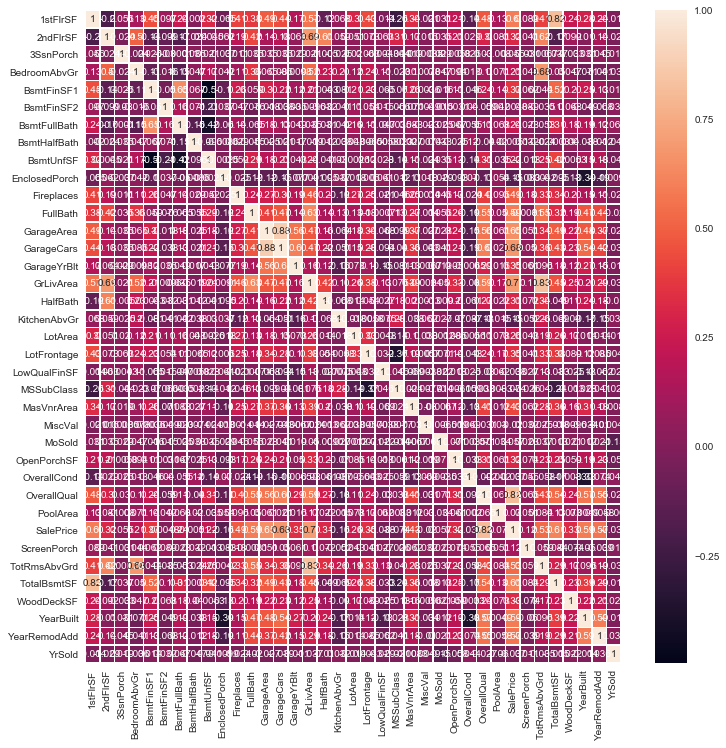

In [37]:
heat= train.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)

In [38]:
df_heat= pd.DataFrame(heat['SalePrice'].sort_values(ascending=False))
df_heat.head()

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888


In [39]:
model = sm.OLS.from_formula("SalePrice ~ \
+ Alley\
+ BedroomAbvGr\
+ BldgType\
+ BsmtCond\
+ BsmtExposure\
+ BsmtFinSF1\
+ BsmtFinSF2\
+ BsmtFinType1\
+ BsmtFinType2\
+ BsmtFullBath\
+ BsmtHalfBath\
+ BsmtQual\
+ BsmtUnfSF\
+ CentralAir\
+ Condition1\
+ Condition2\
+ Electrical\
+ EnclosedPorch\
+ ExterCond\
+ ExterQual\
+ Exterior1st\
+ Exterior2nd\
+ Fence\
+ FireplaceQu\
+ Fireplaces\
+ Foundation\
+ FullBath\
+ Functional\
+ GarageArea\
+ GarageCars\
+ GarageCond\
+ GarageFinish\
+ GarageQual\
+ GarageType\
+ GarageYrBlt\
+ GrLivArea\
+ HalfBath\
+ Heating\
+ HeatingQC\
+ HouseStyle\
+ KitchenAbvGr\
+ KitchenQual\
+ LandContour\
+ LandSlope\
+ LotArea\
+ LotConfig\
+ LotFrontage\
+ LotShape\
+ LowQualFinSF\
+ MSSubClass\
+ MSZoning\
+ MasVnrArea\
+ MasVnrType\
+ MiscFeature\
+ MiscVal\
+ MoSold\
+ Neighborhood\
+ OpenPorchSF\
+ OverallCond\
+ OverallQual\
+ PavedDrive\
+ PoolArea\
+ PoolQC\
+ RoofMatl\
+ RoofStyle\
+ SaleCondition\
+ SaleType\
+ ScreenPorch\
+ Street\
+ TotRmsAbvGrd\
+ TotalBsmtSF\
+ WoodDeckSF\
+ YearBuilt\
+ YearRemodAdd\
+ YrSold", data=train)
result = model.fit()

In [40]:
sm.stats.anova_lm(result, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
GrLivArea,1.405993,1.0,129.752507,1.254024e-28
RoofMatl,1.402408,7.0,18.488810,1.639283e-23
Condition2,1.239443,7.0,16.340341,1.153724e-20
Neighborhood,1.684444,24.0,6.477059,9.377315e-20
OverallCond,0.882846,1.0,81.473681,6.811563e-19
OverallQual,0.844846,1.0,77.966818,3.601283e-18
MSZoning,0.888670,4.0,20.502782,2.312902e-16
Functional,0.592622,6.0,9.115057,8.967986e-10
TotalBsmtSF,0.378348,1.0,34.915992,4.468983e-09
LotArea,0.369788,1.0,34.125998,6.630985e-09


In [41]:
model_all = sm.OLS.from_formula("SalePrice ~ \
+ Alley\
+ BedroomAbvGr\
+ BldgType\
+ BsmtCond\
+ BsmtExposure\
+ BsmtFinSF1\
+ BsmtFinSF2\
+ BsmtFinType1\
+ BsmtFinType2\
+ BsmtFullBath\
+ BsmtHalfBath\
+ BsmtQual\
+ BsmtUnfSF\
+ CentralAir\
+ Condition1\
+ Condition2\
+ Electrical\
+ EnclosedPorch\
+ ExterCond\
+ ExterQual\
+ Exterior1st\
+ Exterior2nd\
+ Fence\
+ FireplaceQu\
+ Fireplaces\
+ Foundation\
+ FullBath\
+ Functional\
+ GarageArea\
+ GarageCars\
+ GarageCond\
+ GarageFinish\
+ GarageQual\
+ GarageType\
+ GarageYrBlt\
+ GrLivArea\
+ HalfBath\
+ Heating\
+ HeatingQC\
+ HouseStyle\
+ KitchenAbvGr\
+ KitchenQual\
+ LandContour\
+ LandSlope\
+ LotArea\
+ LotConfig\
+ LotFrontage\
+ LotShape\
+ LowQualFinSF\
+ MSSubClass\
+ MSZoning\
+ MasVnrArea\
+ MasVnrType\
+ MiscFeature\
+ MiscVal\
+ MoSold\
+ Neighborhood\
+ OpenPorchSF\
+ OverallCond\
+ OverallQual\
+ PavedDrive\
+ PoolArea\
+ PoolQC\
+ RoofMatl\
+ RoofStyle\
+ SaleCondition\
+ SaleType\
+ ScreenPorch\
+ Street\
+ TotRmsAbvGrd\
+ TotalBsmtSF\
+ WoodDeckSF\
+ YearBuilt\
+ YearRemodAdd\
+ YrSold", data=train)
result_all = model_all.fit()
print(result_all.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     81.75
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        18:18:03   Log-Likelihood:                 1368.0
No. Observations:                1460   AIC:                            -2238.
Df Residuals:                    1211   BIC:                            -921.8
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# 다중공선성

In [42]:
numeric_feats = list(train.dtypes[all_data.dtypes != "object"].index)
train['SalePrice'] = y_train

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = train[numeric_feats]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.sort_values('VIF Factor')[-15:]

/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
26,4.506759e+01,OverallCond
27,7.953039e+01,OverallQual
31,8.387970e+01,TotRmsAbvGrd
29,6.856945e+03,SalePrice
34,1.899644e+04,YearBuilt
35,2.133209e+04,YearRemodAdd
36,2.242433e+04,YrSold
15,inf,GrLivArea
8,inf,BsmtUnfSF
5,inf,BsmtFinSF2


In [44]:
def checkVIF(col, train = train, numeric_feats = numeric_feats):
    df = train[numeric_feats]
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    n=col
    bigVIF = list(vif.sort_values('VIF Factor')['features'])[-11:]
    print(bigVIF[n])
    big10 = bigVIF.copy()
    big10.remove(big10[n])
    df = train[big10]
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    vif.sort_values('VIF Factor')
    return display(vif.sort_values('VIF Factor'))

In [45]:
checkVIF(1, train, numeric_feats)

YearRemodAdd


/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
1,5188.132556,YrSold
0,5322.301758,YearBuilt
2,inf,GrLivArea
3,inf,BsmtUnfSF
4,inf,BsmtFinSF2
5,inf,TotalBsmtSF
6,inf,BsmtFinSF1
7,inf,2ndFlrSF
8,inf,LowQualFinSF
9,inf,1stFlrSF


- YearRemodAdd는 YrSold, YearBuilt와 다중공선성을 띈다.

In [46]:
checkVIF(3, train, numeric_feats)

/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


GrLivArea


,VIF Factor,features
8,1.061231e+00,LowQualFinSF
7,1.800516e+00,2ndFlrSF
9,3.130933e+01,1stFlrSF
0,7.519663e+03,YearBuilt
2,1.089675e+04,YrSold
1,1.514245e+04,YearRemodAdd
3,inf,BsmtUnfSF
4,inf,BsmtFinSF2
5,inf,TotalBsmtSF
6,inf,BsmtFinSF1


- GrLivArea는 LowQualFinSF, 2ndFlrSF, 1stFlrSF와 다중공선성을 띈다.

In [47]:
checkVIF(6, train, numeric_feats)

/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


TotalBsmtSF


,VIF Factor,features
5,1.509510e+00,BsmtFinSF2
6,7.789540e+00,BsmtFinSF1
4,9.827495e+00,BsmtUnfSF
0,7.519663e+03,YearBuilt
2,1.089675e+04,YrSold
1,1.514245e+04,YearRemodAdd
3,inf,GrLivArea
7,inf,2ndFlrSF
8,inf,LowQualFinSF
9,inf,1stFlrSF


- TotalBsmtSF는 BsmtFinSF2, BsmtFinSF1, BsmtUnfSF와 다중공선성을 띈다.

In [48]:
numeric_feats = list(train.dtypes[all_data.dtypes != "object"].index)
train['SalePrice'] = y_train

In [49]:
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [50]:
model_all = sm.OLS.from_formula("SalePrice ~ \
+ Alley\
+ BedroomAbvGr\
+ BldgType\
+ BsmtCond\
+ BsmtExposure\
+ BsmtFinType1\
+ BsmtFinType2\
+ BsmtFullBath\
+ BsmtHalfBath\
+ BsmtQual\
+ CentralAir\
+ Condition1\
+ Condition2\
+ Electrical\
+ EnclosedPorch\
+ ExterCond\
+ ExterQual\
+ Exterior1st\
+ Exterior2nd\
+ Fence\
+ FireplaceQu\
+ Fireplaces\
+ Foundation\
+ FullBath\
+ Functional\
+ GarageArea\
+ GarageCars\
+ GarageCond\
+ GarageFinish\
+ GarageQual\
+ GarageType\
+ GarageYrBlt\
+ GrLivArea\
+ HalfBath\
+ Heating\
+ HeatingQC\
+ HouseStyle\
+ KitchenAbvGr\
+ KitchenQual\
+ LandContour\
+ LandSlope\
+ LotArea\
+ LotConfig\
+ LotFrontage\
+ LotShape\
+ MSSubClass\
+ MSZoning\
+ MasVnrArea\
+ MasVnrType\
+ MiscFeature\
+ MiscVal\
+ MoSold\
+ Neighborhood\
+ OpenPorchSF\
+ OverallCond\
+ OverallQual\
+ PavedDrive\
+ PoolArea\
+ PoolQC\
+ RoofMatl\
+ RoofStyle\
+ SaleCondition\
+ SaleType\
+ ScreenPorch\
+ Street\
+ TotRmsAbvGrd\
+ TotalBsmtSF\
+ WoodDeckSF\
+ YearRemodAdd", data=train)
result_all = model_all.fit()
print(result_all.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     80.79
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        18:18:18   Log-Likelihood:                 1343.1
No. Observations:                1460   AIC:                            -2198.
Df Residuals:                    1216   BIC:                            -908.4
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [51]:
for x in list(sm.stats.anova_lm(result_all, typ=2).sort_values('PR(>F)')[:30].index):
    print('+',x)

+ GrLivArea
+ Neighborhood
+ RoofMatl
+ OverallQual
+ Condition2
+ MSZoning
+ OverallCond
+ TotalBsmtSF
+ Functional
+ LotArea
+ BsmtFullBath
+ Condition1
+ ScreenPorch
+ LandSlope
+ BsmtFinType1
+ CentralAir
+ YearRemodAdd
+ SaleCondition
+ GarageArea
+ HalfBath
+ WoodDeckSF
+ KitchenQual
+ Exterior1st
+ Heating
+ Foundation
+ LotConfig
+ HeatingQC
+ FullBath
+ BsmtExposure
+ SaleType


In [52]:
model_top30 = sm.OLS.from_formula("SalePrice ~ scale(GrLivArea)\
+ C(Neighborhood)\
+ C(RoofMatl)\
+ scale(OverallQual)\
+ C(Condition2)\
+ C(MSZoning)\
+ scale(OverallCond)\
+ scale(TotalBsmtSF)\
+ C(Functional)\
+ scale(LotArea)\
+ scale(BsmtFullBath)\
+ C(Condition1)\
+ scale(ScreenPorch)\
+ C(LandSlope)\
+ C(BsmtFinType1)\
+ C(CentralAir)\
+ scale(YearRemodAdd)\
+ C(SaleCondition)\
+ scale(GarageArea)\
+ scale(HalfBath)\
+ scale(WoodDeckSF)\
+ C(KitchenQual)\
+ C(Exterior1st)\
+ C(Heating)\
+ C(Foundation)\
+ C(LotConfig)\
+ C(HeatingQC)\
+ scale(FullBath)\
+ C(BsmtExposure)\
+ C(SaleType)", data=train)
result_top30 = model_top30.fit()
print(result_top30.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        18:18:46   Log-Likelihood:                 1212.0
No. Observations:                1460   AIC:                            -2164.
Df Residuals:                    1330   BIC:                            -1477.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

##### 레버리지 & 아웃라이어

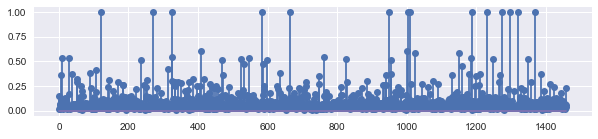

In [53]:
influence = result_top30.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

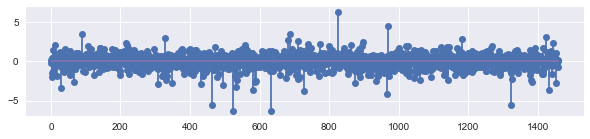

In [54]:
# 표준화 잔차
plt.figure(figsize=(10, 2))
plt.stem(result_top30.resid_pearson)
plt.show()

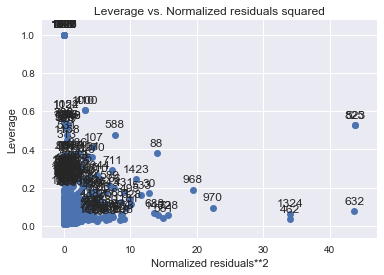

In [55]:
plt.figure(figsize=(50, 50))
sm.graphics.plot_leverage_resid2(result_top30)
plt.show()

In [56]:
train.shape

(1460, 79)

In [57]:
influence = result_top30.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 38)


/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: divide by zero encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:403: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: inv

In [60]:
idx = np.where(cooks_d2 > fox_cr)[0]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [61]:
idx

array([   9,   29,   30,   66,   88,  107,  140,  185,  217,  237,  253,
        313,  324,  325,  328,  335,  371,  375,  383,  386,  406,  410,
        418,  431,  435,  438,  439,  462,  469,  479,  482,  495,  523,
        529,  531,  533,  548,  557,  581,  588,  589,  632,  636,  676,
        681,  688,  693,  705,  710,  711,  714,  728,  738,  747,  749,
        799,  811,  812,  825,  874,  885,  888,  913,  916,  935,  942,
        948,  968,  970, 1000, 1003, 1011, 1024, 1044, 1045, 1062, 1092,
       1122, 1131, 1132, 1139, 1152, 1158, 1163, 1173, 1180, 1181, 1186,
       1187, 1200, 1211, 1248, 1267, 1270, 1275, 1292, 1321, 1324, 1325,
       1337, 1349, 1370, 1380, 1387, 1412, 1423, 1432, 1440, 1443, 1453])

In [62]:


df_fin = train.copy()
df_fin = df_fin.drop(df_fin.index[idx])

In [63]:
import statsmodels.formula.api as smf
model_top30 = smf.ols("SalePrice ~ scale(GrLivArea)\
+ C(Neighborhood)\
+ C(RoofMatl)\
+ scale(OverallQual)\
+ C(Condition2)\
+ C(MSZoning)\
+ scale(OverallCond)\
+ scale(TotalBsmtSF)\
+ C(Functional)\
+ scale(LotArea)\
+ scale(BsmtFullBath)\
+ C(Condition1)\
+ scale(ScreenPorch)\
+ C(LandSlope)\
+ C(BsmtFinType1)\
+ C(CentralAir)\
+ scale(YearRemodAdd)\
+ C(SaleCondition)\
+ scale(GarageArea)\
+ scale(HalfBath)\
+ scale(WoodDeckSF)\
+ C(KitchenQual)\
+ C(Exterior1st)\
+ C(Heating)\
+ C(Foundation)\
+ C(LotConfig)\
+ C(HeatingQC)\
+ scale(FullBath)\
+ C(BsmtExposure)\
+ C(SaleType)", data=df_fin, missing='drop')
result_top30 = model_top30.fit()
print(result_top30.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     232.4
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        18:23:53   Log-Likelihood:                 1508.3
No. Observations:                1350   AIC:                            -2791.
Df Residuals:                    1237   BIC:                            -2202.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [64]:
test = test.fillna(method='ffill')
pre = pd.DataFrame(result_top30.predict(test, missing='drop'))

PatsyError: Error converting data to categorical: observation with value 'PosN' does not match any of the expected levels (expected: ['Feedr', 'Norm', 'PosA', 'RRAe'])
    SalePrice ~ scale(GrLivArea)+ C(Neighborhood)+ C(RoofMatl)+ scale(OverallQual)+ C(Condition2)+ C(MSZoning)+ scale(OverallCond)+ scale(TotalBsmtSF)+ C(Functional)+ scale(LotArea)+ scale(BsmtFullBath)+ C(Condition1)+ scale(ScreenPorch)+ C(LandSlope)+ C(BsmtFinType1)+ C(CentralAir)+ scale(YearRemodAdd)+ C(SaleCondition)+ scale(GarageArea)+ scale(HalfBath)+ scale(WoodDeckSF)+ C(KitchenQual)+ C(Exterior1st)+ C(Heating)+ C(Foundation)+ C(LotConfig)+ C(HeatingQC)+ scale(FullBath)+ C(BsmtExposure)+ C(SaleType)
                                                                                    ^^^^^^^^^^^^^

In [ ]:

pre  = pd.DataFrame(result_top30.predict(test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))


In [ ]:
pre.to_csv('../submission_OLS.csv', index=False)

In [ ]:
pre